In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,r2_score
import joblib

In [85]:
df=pd.read_csv("/content/sample_data/waste_classification_large.csv")
df

,weight,organic_content,moisture_level,recyclability,label
0,2.709688,48.281839,45.110420,0,0
1,0.353935,27.668283,53.979818,0,0
2,1.749361,98.751607,81.943609,1,0
3,0.758632,78.034387,51.237899,1,0
4,0.410537,11.785714,47.376145,1,1
...,...,...,...,...,...
99995,1.842977,6.477280,83.107695,1,0
99996,1.616084,11.636999,29.724507,0,0
99997,3.375007,26.106296,99.545342,0,0
99998,4.412503,16.663873,51.137623,0,0


In [86]:
from sklearn.preprocessing import MinMaxScaler
def pp_data(df):
  df.dropna(inplace=True)
  scaler=MinMaxScaler()
  df[['weight', 'organic_content','moisture_level']]=scaler.fit_transform(df[['weight', 'organic_content','moisture_level']])
  return df

dff=pp_data(df)
dff

,weight,organic_content,moisture_level,recyclability,label
0,0.532591,0.482821,0.451112,0,0
1,0.051819,0.276682,0.539808,0,0
2,0.336603,0.987526,0.819453,1,0
3,0.134411,0.780351,0.512388,1,0
4,0.063370,0.117854,0.473770,1,1
...,...,...,...,...,...
99995,0.355709,0.064769,0.831094,1,0
99996,0.309403,0.116367,0.297250,0,0
99997,0.668372,0.261062,0.995474,0,0
99998,0.880109,0.166637,0.511386,0,0


In [88]:
X=dff.drop('label',axis=1)
y=dff['label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 4), (20000, 4), (80000,), (20000,))

In [90]:
noise = np.random.normal(0, 0.05, X_train.shape)
X_train_noisy = X_train + noise

In [91]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [92]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

recyclability      0.374868
moisture_level     0.329156
organic_content    0.295612
weight             0.000364
dtype: float64


In [93]:
joblib.dump(model,'waste_classification_model.pkl')

['waste_classification_model.pkl']

In [94]:
y_pred=model.predict(X_test)

In [95]:
manual_pred = model.predict([[2.709688219502771,48.2818390761823,45.11041994436166,0]])
print("Manual Prediction:", manual_pred)

Manual Prediction: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [96]:
eval_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", eval_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17508
           1       1.00      1.00      1.00      2492

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [98]:
r212=r2_score(y_test,y_pred)
r212

0.9995415991442206

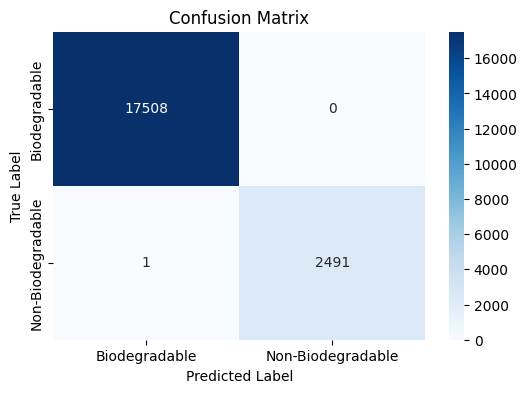

<ipython-input-99-0d99a4ac319e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


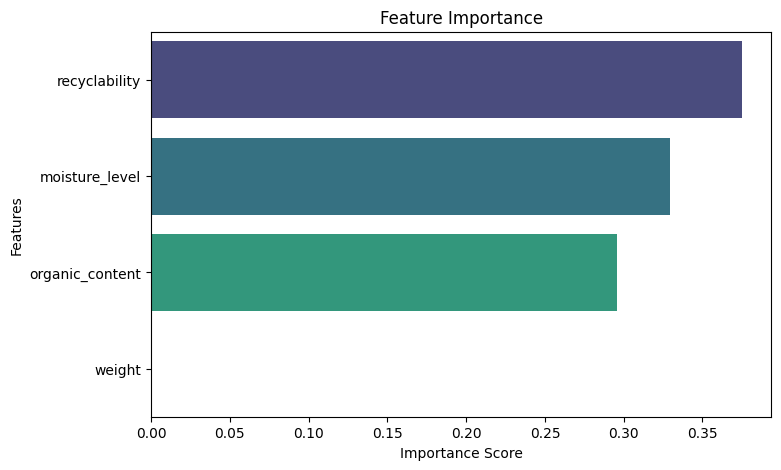

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Biodegradable", "Non-Biodegradable"], yticklabels=["Biodegradable", "Non-Biodegradable"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Graph
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

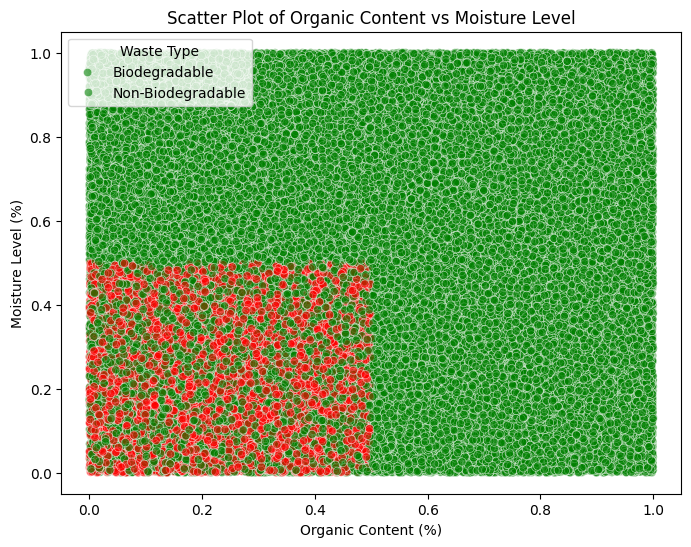

In [100]:
# Scatter Plot for Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['organic_content'], y=df['moisture_level'], hue=df['label'], palette=['green', 'red'], alpha=0.6)
plt.xlabel("Organic Content (%)")
plt.ylabel("Moisture Level (%)")
plt.title("Scatter Plot of Organic Content vs Moisture Level")
plt.legend(title="Waste Type", labels=["Biodegradable", "Non-Biodegradable"])
plt.show()
